Generation = 1
Fitness    = 3.752462625809159
Generation = 2
Fitness    = 3.752462625809159
Generation = 3
Fitness    = 3.752462625809159
Generation = 4
Fitness    = 3.9684433525301044
Generation = 5
Fitness    = 3.9684433525301044
Generation = 6
Fitness    = 3.9684433525301044
Generation = 7
Fitness    = 3.9684433525301044
Generation = 8
Fitness    = 4.889604660893265
Generation = 9
Fitness    = 4.889604660893265
Generation = 10
Fitness    = 4.889604660893265
Generation = 11
Fitness    = 4.889604660893265
Generation = 12
Fitness    = 4.889604660893265
Generation = 13
Fitness    = 6.6648564545966735
Generation = 14
Fitness    = 6.6648564545966735
Generation = 15
Fitness    = 6.6648564545966735
Generation = 16
Fitness    = 6.6648564545966735
Generation = 17
Fitness    = 7.109442702694999
Generation = 18
Fitness    = 7.109442702694999
Generation = 19
Fitness    = 7.109442702694999
Generation = 20
Fitness    = 7.109442702694999
Generation = 21
Fitness    = 7.146889032709896
Generation = 2

Fitness    = 28.952483014905564
Generation = 182
Fitness    = 28.952483014905564
Generation = 183
Fitness    = 28.952483014905564
Generation = 184
Fitness    = 28.952483014905564
Generation = 185
Fitness    = 28.952483014905564
Generation = 186
Fitness    = 28.952483014905564
Generation = 187
Fitness    = 29.116367233668274
Generation = 188
Fitness    = 29.116367233668274
Generation = 189
Fitness    = 29.116367233668274
Generation = 190
Fitness    = 29.116367233668274
Generation = 191
Fitness    = 29.116367233668274
Generation = 192
Fitness    = 29.116367233668274
Generation = 193
Fitness    = 29.116367233668274
Generation = 194
Fitness    = 29.116367233668274
Generation = 195
Fitness    = 29.116367233668274
Generation = 196
Fitness    = 29.116367233668274
Generation = 197
Fitness    = 29.116367233668274
Generation = 198
Fitness    = 29.116367233668274
Generation = 199
Fitness    = 29.116367233668274
Generation = 200
Fitness    = 29.116367233668274
Generation = 201
Fitness    = 29.1163

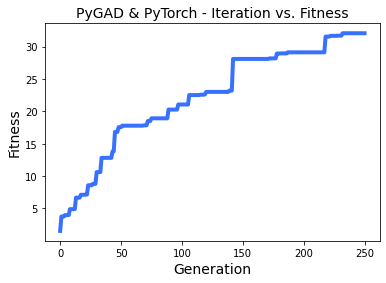

Fitness value of the best solution = 32.065291085917465
Index of the best solution : 0
Predictions : 
 [[0.10062443]
 [0.60151345]
 [1.4112719 ]
 [2.4886644 ]]
Absolute Error :  0.031186359


In [3]:
import torch
import pygad.torchga as torchga
import pygad

def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, torch_ga, model, loss_function

    predictions = pygad.torchga.predict(model=model,
                                        solution=solution,
                                        data=data_inputs)

    abs_error = loss_function(predictions, data_outputs).detach().numpy() + 0.00000001

    solution_fitness = 1.0 / abs_error

    return solution_fitness

def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

# Create the PyTorch model.
input_layer = torch.nn.Linear(3, 5)
relu_layer = torch.nn.ReLU()
output_layer = torch.nn.Linear(5, 1)

model = torch.nn.Sequential(input_layer,
                            relu_layer,
                            output_layer)
# print(model)

# Create an instance of the pygad.torchga.TorchGA class to build the initial population.
torch_ga = torchga.TorchGA(model=model,
                           num_solutions=10)

loss_function = torch.nn.L1Loss()

# Data inputs
data_inputs = torch.tensor([[0.02, 0.1, 0.15],
                            [0.7, 0.6, 0.8],
                            [1.5, 1.2, 1.7],
                            [3.2, 2.9, 3.1]])

# Data outputs
data_outputs = torch.tensor([[0.1],
                             [0.6],
                             [1.3],
                             [2.5]])

# Prepare the PyGAD parameters. Check the documentation for more information: https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#pygad-ga-class
num_generations = 250 # Number of generations.
num_parents_mating = 5 # Number of solutions to be selected as parents in the mating pool.
initial_population = torch_ga.population_weights # Initial population of network weights

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation)

ga_instance.run()

# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_fitness(title="PyGAD & PyTorch - Iteration vs. Fitness", linewidth=4)

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# Make predictions based on the best solution.
predictions = pygad.torchga.predict(model=model,
                                    solution=solution,
                                    data=data_inputs)
print("Predictions : \n", predictions.detach().numpy())

abs_error = loss_function(predictions, data_outputs)
print("Absolute Error : ", abs_error.detach().numpy())